# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error

# Preprocessing Data

## Step 1: Reading Dataset

In [2]:
df = pd.read_csv("modified_diabetes_prediction_dataset.csv")


## Step 2: Sanity Chack of Data
Check if there is any missing or *duplicated* data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100001 non-null  object 
 1   age                  99999 non-null   float64
 2   hypertension         100001 non-null  int64  
 3   heart_disease        100001 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100001 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100001 non-null  int64  
 8   diabetes             100001 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.shape

(100001, 9)

In [7]:
df.isnull().sum()

gender                 0
age                    2
hypertension           0
heart_disease          0
smoking_history        1
bmi                    0
HbA1c_level            1
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [11]:
for col in df.columns:
  print(df[col].value_counts())

Female     58552
Male       41430
Other         18
unknown        1
Name: gender, dtype: int64
 48.00    1591
 50.00    1586
 52.00    1568
 51.00    1560
 54.00    1543
          ... 
 5.88        4
-0.60        4
-4.84        3
 0.40        2
-4.92        1
Name: age, Length: 222, dtype: int64
0    92516
1     7485
Name: hypertension, dtype: int64
0    96059
1     3942
Name: heart_disease, dtype: int64
No Info        35817
never          35094
former          9352
current         9285
not current     6447
ever            4004
yes                1
Name: smoking_history, dtype: int64
101.665015    1
26.628701     1
36.683750     1
20.367588     1
31.288412     1
             ..
26.142655     1
18.256319     1
31.582976     1
23.840415     1
25.698752     1
Name: bmi, Length: 100001, dtype: int64
6.6    8541
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7470
8.8     661
8.2     661
9.0     654
7.5     643
6

## Step 3: Exploratory Data Analysis (EDA)

In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99999.000000,100001.000000,100001.000000,100001.000000,100000.000000,100001.000000,100001.000000
mean,41.391930,0.074849,0.039420,27.318426,5.527523,138.155888,0.084999
std,22.669181,0.263149,0.194592,6.935843,1.070676,51.279018,0.278882
min,-4.920000,0.000000,0.000000,3.629572,3.500000,80.000000,0.000000
25%,23.000000,0.000000,0.000000,23.382033,4.800000,100.000000,0.000000
50%,42.000000,0.000000,0.000000,26.964724,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,30.279663,6.200000,159.000000,0.000000
max,84.000000,1.000000,1.000000,101.665015,9.000000,9999.000000,1.000000


In [13]:
df.describe(include="object")

,gender,smoking_history
count,100001,100000
unique,4,7
top,Female,No Info
freq,58552,35817


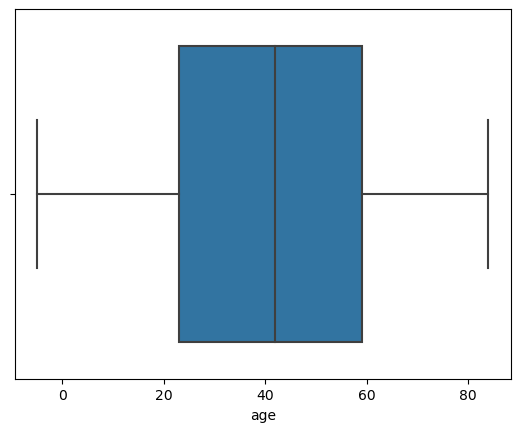

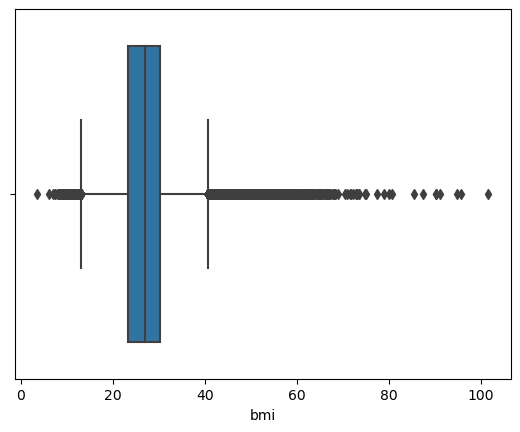

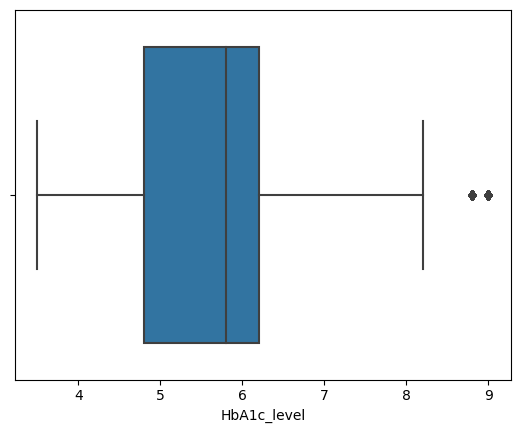

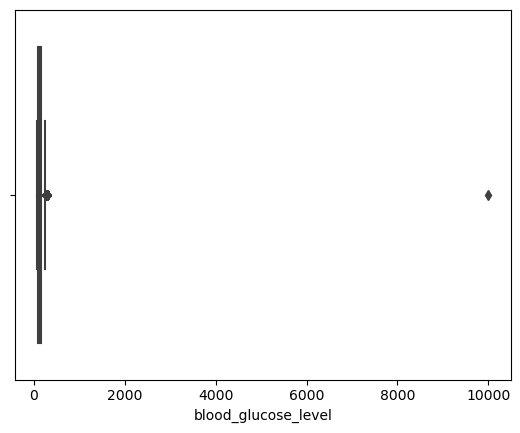

In [14]:
for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
  sns.boxplot(data=df, x=col)
  plt.show()

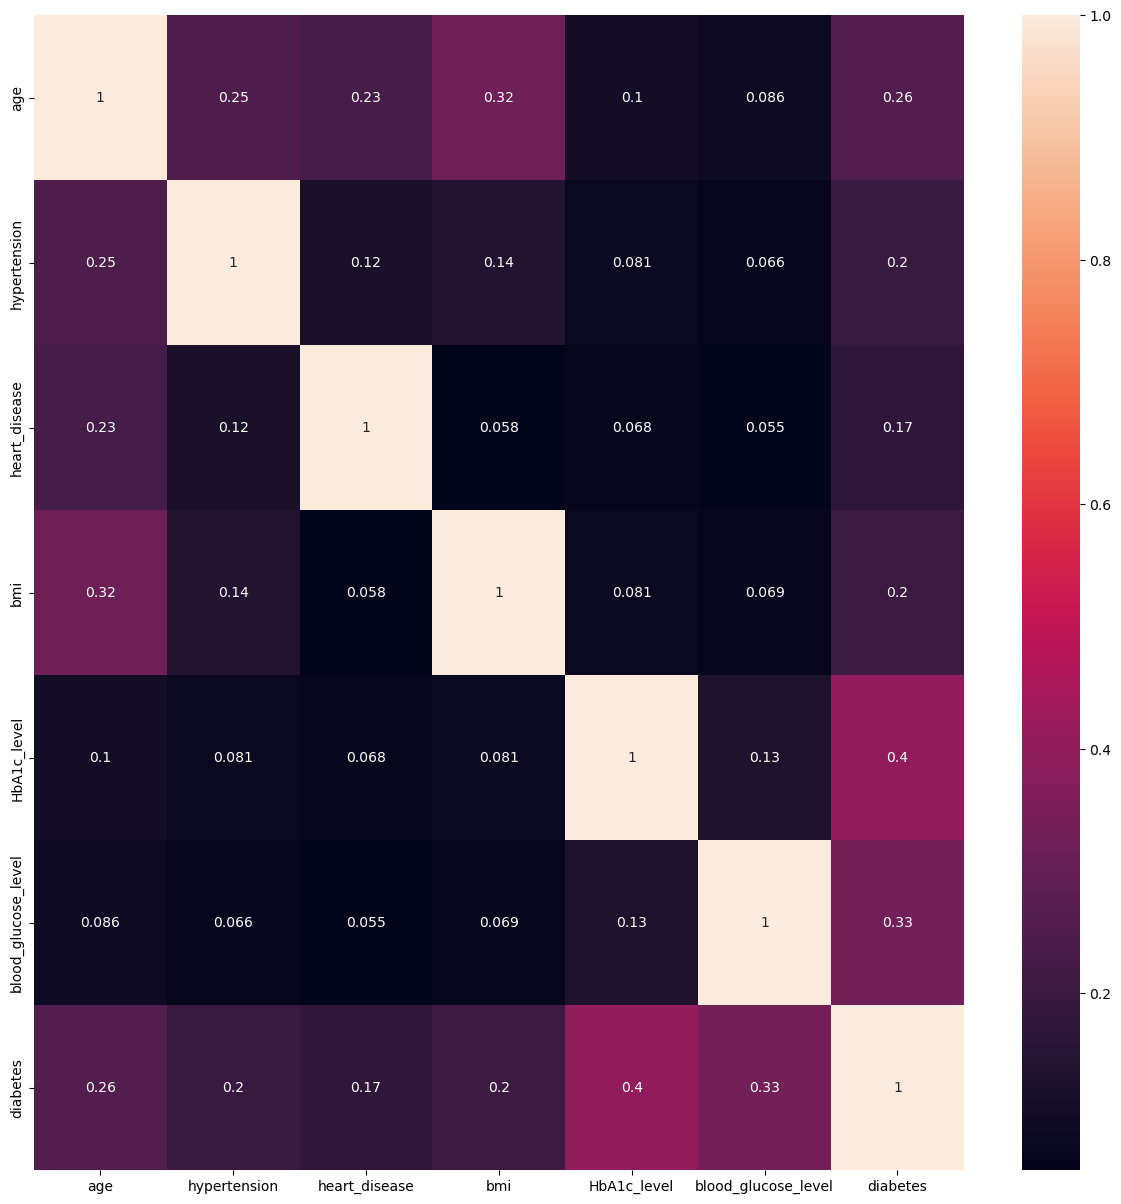

In [15]:
s = df.select_dtypes(include="number")
plt.figure(figsize=(15,15))
sns.heatmap(s.corr(), annot=True)
plt.show()

## Step 4: Treating Missing Values


In [3]:
df = df.drop(columns=["smoking_history"], axis=1)

In [4]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object'])

Using KNN imputer to replace the missing values in numerical columns.

In [5]:
imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

Using mode to replace missing values in categorical columns.

In [6]:
df['gender'] = df['gender'].replace('unknown', df['gender'].mode()[0])

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Step 5: Treating Outliers
Deleting all the outliers.

In [8]:
df = df[df['age'] >= 0]

In [9]:
df = df[(df['bmi'] >= 10) & (df['bmi'] <= 80)]

In [10]:
df = df[df['blood_glucose_level'] <= 300]

## Step 6: Encoding
We should do encoding for the categorical features.

In [11]:
df = pd.get_dummies(df, columns=['gender'], drop_first=False)

In [12]:
df = df.replace({True: 1, False: 0}).astype(int)

In [13]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
1,38,0,0,28,6,80,0,1,0,0
3,37,0,0,25,5,155,0,1,0,0
4,75,1,1,23,4,155,0,0,1,0
5,16,0,0,28,6,85,0,1,0,0
6,46,0,0,16,6,200,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,81,0,0,27,6,90,0,1,0,0
99997,70,0,0,27,5,155,0,0,1,0
99998,23,0,0,35,4,100,0,1,0,0
99999,54,0,0,21,6,90,0,1,0,0


# Spliting Data into X and y

In [14]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize Data

In [15]:
scaler = StandardScaler()
numerical_cols = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

X_train[numerical_cols] = X_train_scaled
X_test[numerical_cols] = X_test_scaled


# Decision Tree Model

## Step 1: Train

In [16]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=42, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

## Step 2: Test

In [17]:
y_pred = dtree.predict(X_test)

## Step 3: Evaluate

In [18]:
tree_acc = accuracy_score(y_test, y_pred)
tree_prec = precision_score(y_test, y_pred)
tree_recall = recall_score(y_test, y_pred)
tree_f1score = f1_score(y_test, y_pred)

In [19]:
print(f"Accuracy: {tree_acc}")
print(f"Precision: {tree_prec}")
print(f"Recall: {tree_recall}")
print(f"F1 Score: {tree_f1score}")

Accuracy: 0.9660569105691057
Precision: 0.976889444097439
Recall: 0.6184262554369316
F1 Score: 0.7573849878934624


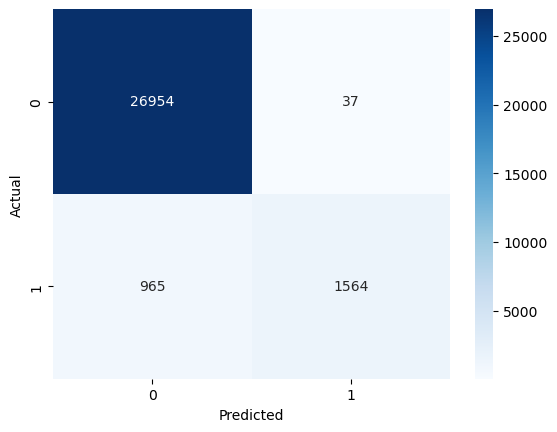

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

## Step 1: Train

In [36]:
svm = SVC(kernel='poly', degree=5)
svm.fit(X_train, y_train)

SVC(degree=5, kernel='poly')

## Step 2: Test

In [37]:
y_pred = svm.predict(X_test)

## Step 3: Evaluate

In [40]:
svm_acc = accuracy_score(y_test, y_pred)
svm_prec = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1score = f1_score(y_test, y_pred)
svm_MSSE = mean_squared_error(y_test,y_pred)

In [41]:
print(f"Accuracy: {svm_acc}")
print(f"Precision: {svm_prec}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1score}")
print(f"MSSE: {svm_MSSE}")

Accuracy: 0.9665989159891599
Precision: 0.9967804249839022
Recall: 0.6120996441281139
F1 Score: 0.7584517393434591
MSSE: 0.03340108401084011


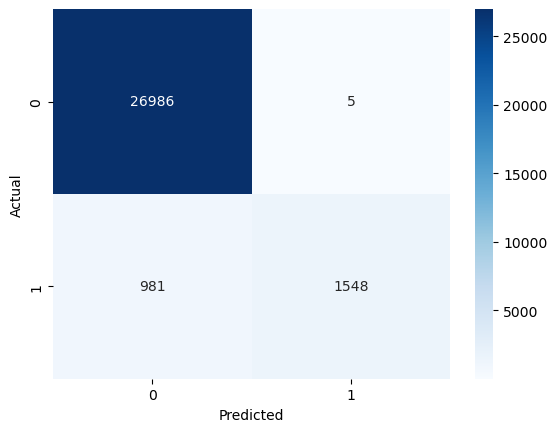

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Choose Features

In [21]:
importance = dtree.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

top_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature']
print("Selected Features for Clustering:", list(top_features))

X = X[top_features]

               Feature  Importance
5  blood_glucose_level    0.573168
4          HbA1c_level    0.369547
0                  age    0.021369
3                  bmi    0.020171
1         hypertension    0.008102
2        heart_disease    0.006120
7          gender_Male    0.001194
6        gender_Female    0.000330
8         gender_Other    0.000000
Selected Features for Clustering: ['blood_glucose_level', 'HbA1c_level', 'age', 'bmi']


# K-Means

## Step 1: Find The Best K

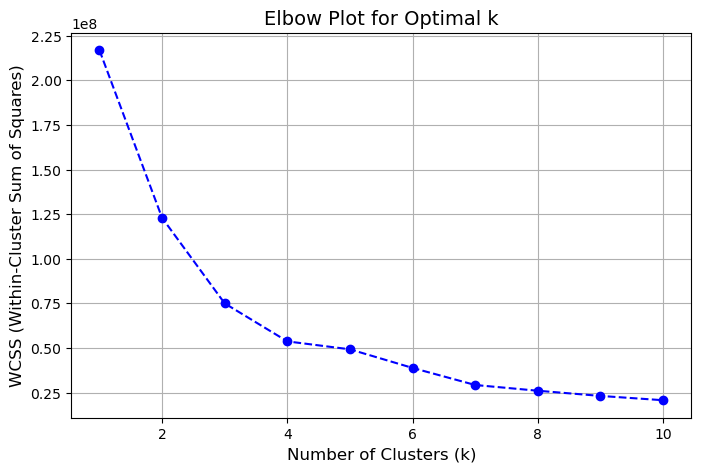

In [23]:
k_values = range(1, 11)

wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[top_features])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Plot for Optimal k', fontsize=14)
plt.grid()
plt.show()


## Step 2: Train

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X[top_features])

KMeans(n_clusters=3)

## Step 3: Importance of Features in Each Cluster

In [25]:
X['Cluster'] = kmeans.labels_

cluster_summary = X.groupby('Cluster').mean()

for cluster_id in cluster_summary.index:
    print(f"\nCluster {cluster_id}:")
    print(cluster_summary.loc[cluster_id].sort_values(ascending=False))


Cluster 0:
blood_glucose_level    146.474133
age                     41.837717
bmi                     26.912617
HbA1c_level              5.116283
Name: 0, dtype: float64

Cluster 1:
blood_glucose_level    88.749277
age                    40.355505
bmi                    26.532733
HbA1c_level             5.008970
Name: 1, dtype: float64

Cluster 2:
blood_glucose_level    218.718020
age                     47.882594
bmi                     28.329240
HbA1c_level              5.566564
Name: 2, dtype: float64


## Step 4: Relation Between Features in Each Cluster

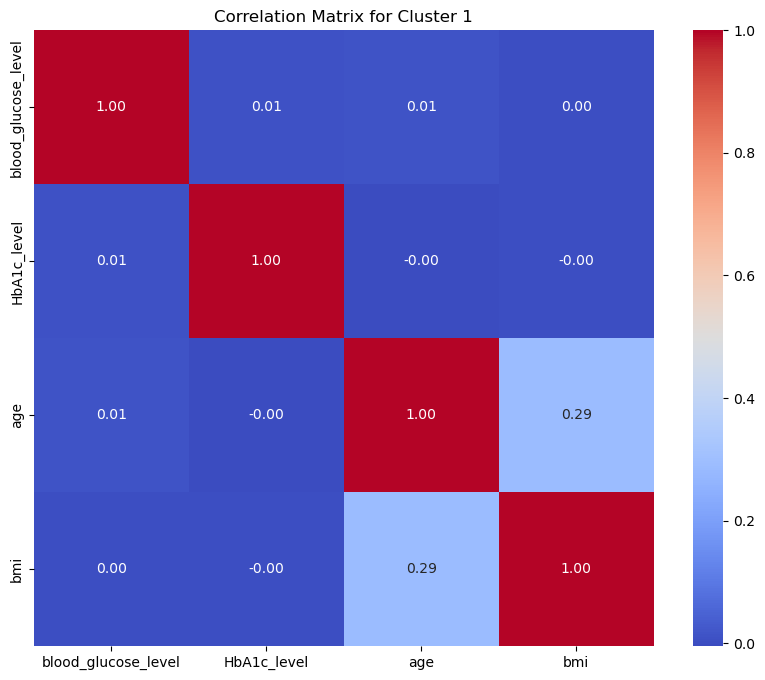

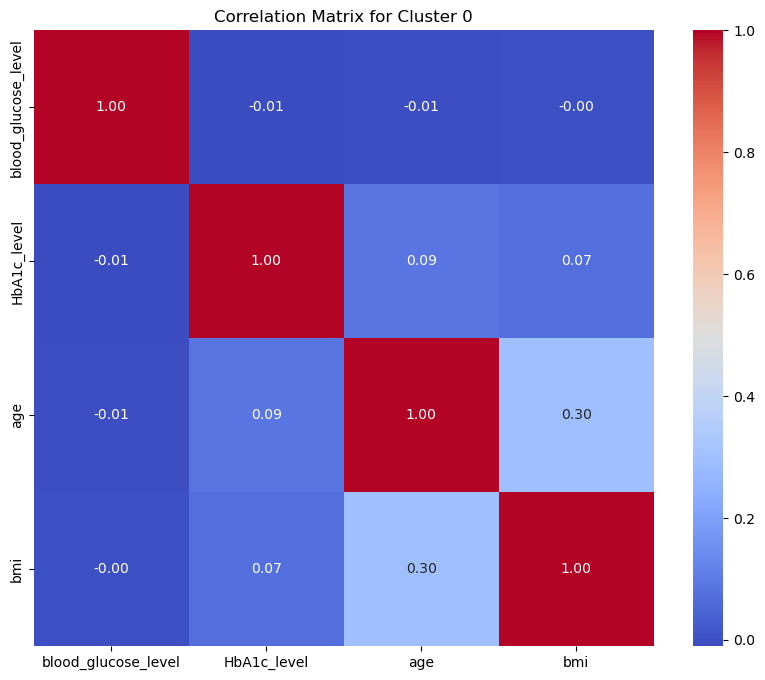

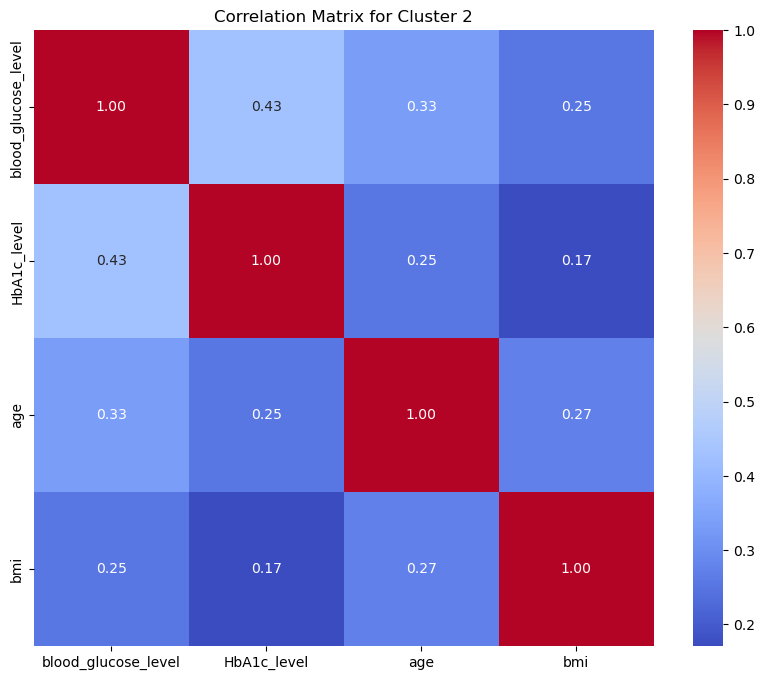

In [29]:
for cluster in X['Cluster'].unique():
    subset = X[X['Cluster'] == cluster].drop(columns=['Cluster'])
    corr_matrix = subset.corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for Cluster {cluster}')
    plt.show()

# Hierarchical Clustering

## Step 1: Sampling

In [22]:
sample_X = X.sample(n=5000)
sample_X

,blood_glucose_level,HbA1c_level,age,bmi
20783,200,5,61,18
60080,160,5,57,24
8172,130,6,66,26
89440,160,6,31,24
28153,140,6,21,19
...,...,...,...,...
18676,140,4,45,28
68747,100,6,62,25
80558,200,3,40,32
746,300,5,66,34


## Step 2: Linkage Matrix

In [23]:
Z = linkage(sample_X, method='ward')

## Step 3: Visualizing Dendogram

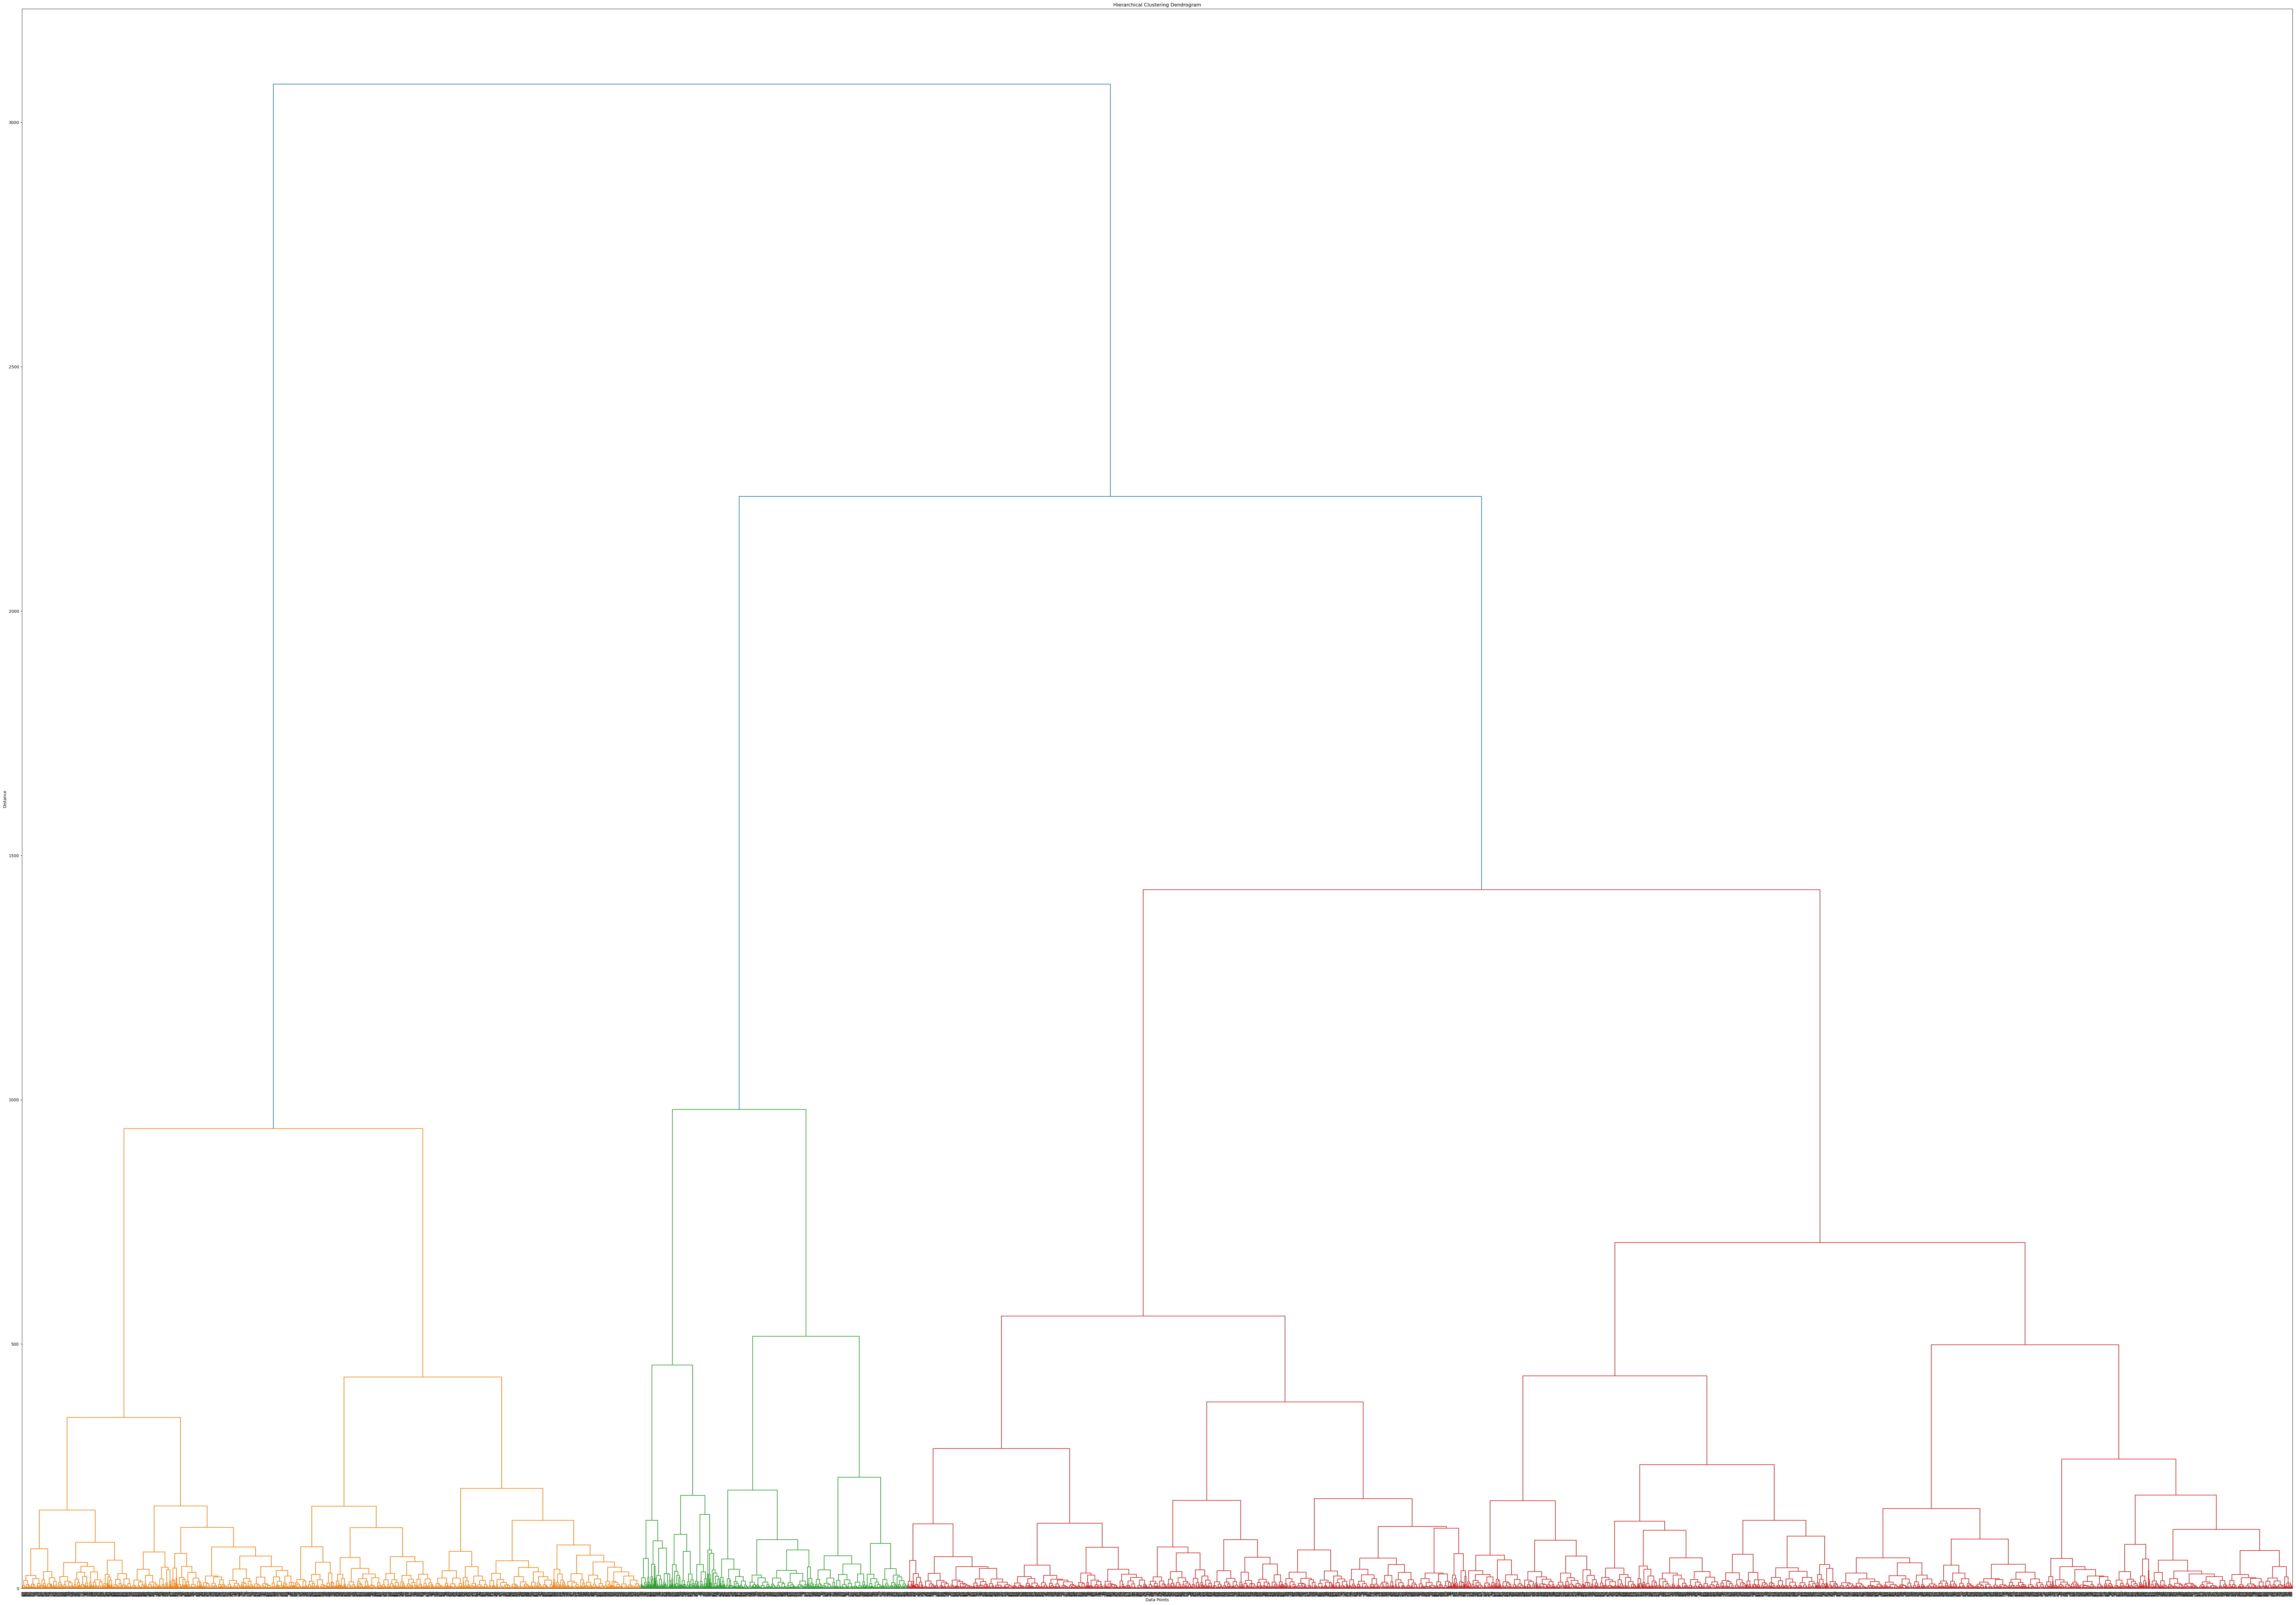

In [24]:
plt.figure(figsize=(100, 70))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

C:\Users\Banaz\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


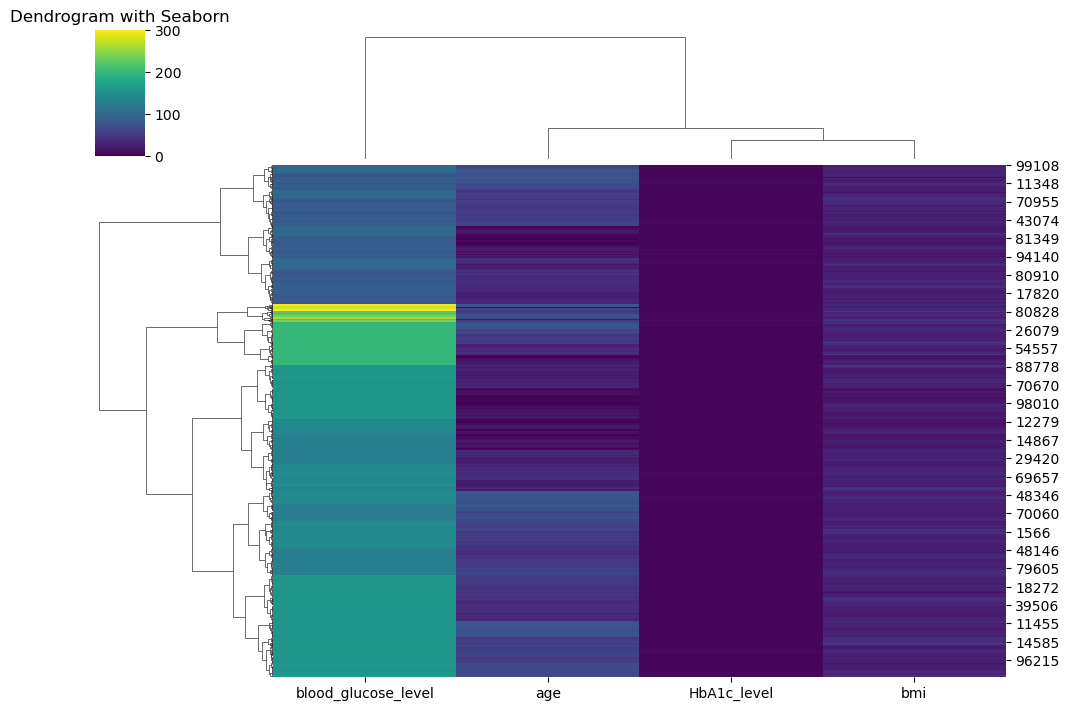

In [25]:
sns.clustermap(sample_X, method='ward', cmap='viridis', figsize=(10, 7))
plt.title('Dendrogram with Seaborn')
plt.show()

In [34]:
threshold = 1000 
clusters = fcluster(Z, threshold, criterion='distance')
sample_X["Cluster"] = clusters
sample_X

,blood_glucose_level,HbA1c_level,age,bmi,Cluster
20783,200,5,61,18,2
60080,160,5,57,24,4
8172,130,6,66,26,4
89440,160,6,31,24,4
28153,140,6,21,19,3
...,...,...,...,...,...
18676,140,4,45,28,4
68747,100,6,62,25,1
80558,200,3,40,32,2
746,300,5,66,34,2


In [35]:
num_clusters = len(np.unique(clusters))

print("Number of clusters:", num_clusters)

Number of clusters: 4


In [36]:
cluster_means = sample_X.groupby("Cluster").mean()
print(cluster_means)

         blood_glucose_level  HbA1c_level        age        bmi
Cluster                                                        
1                  89.145268     4.981658  40.155539  26.368305
2                 217.649063     5.620102  48.408859  28.051107
3                 145.495942     5.030844  19.296266  24.318182
4                 147.684268     5.150165  56.284928  28.668867


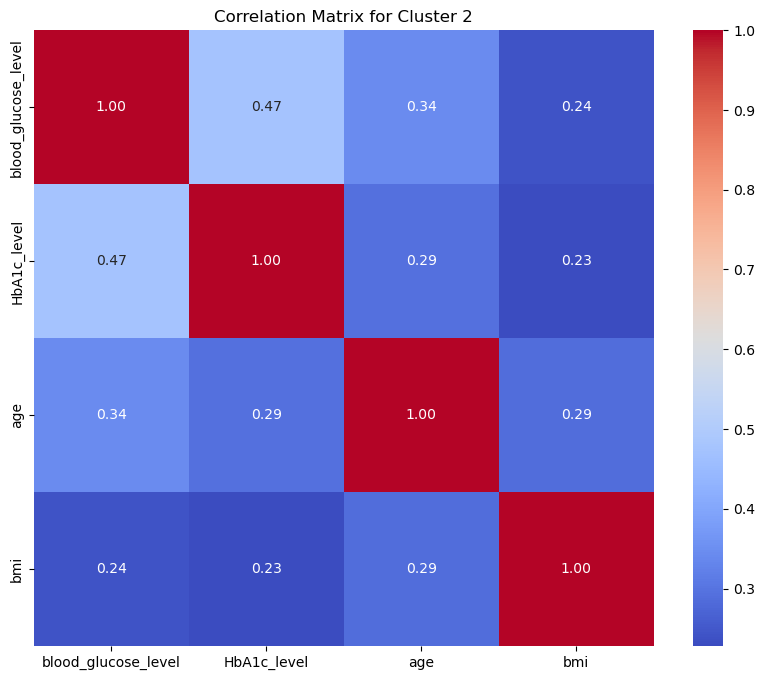

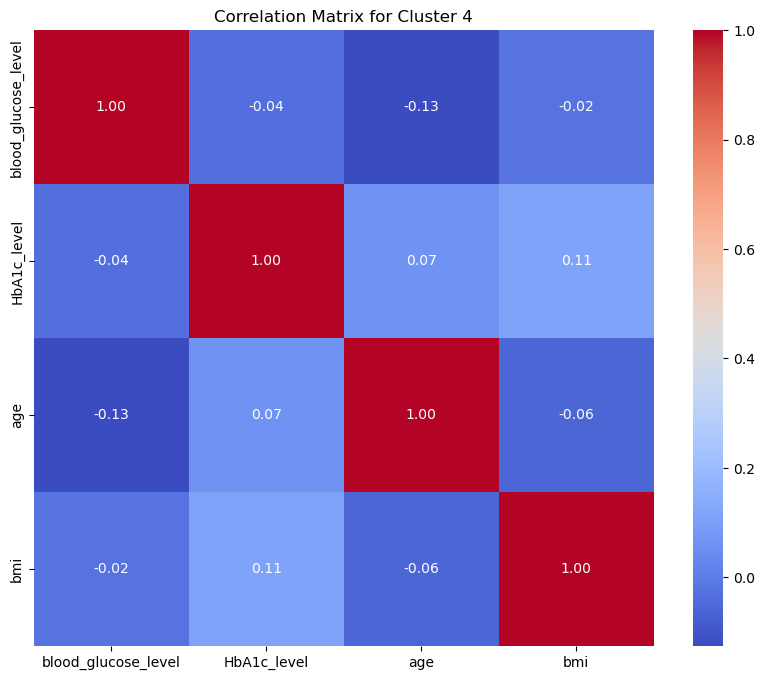

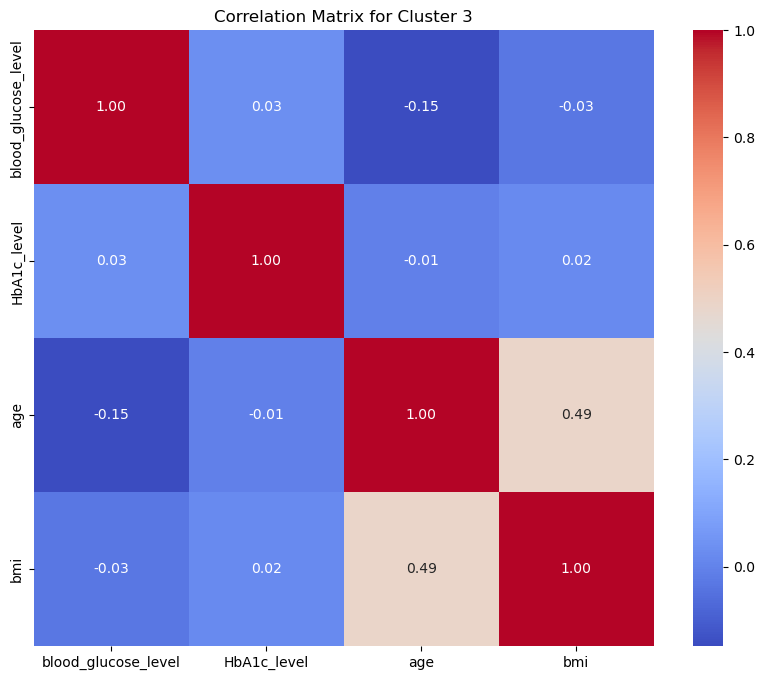

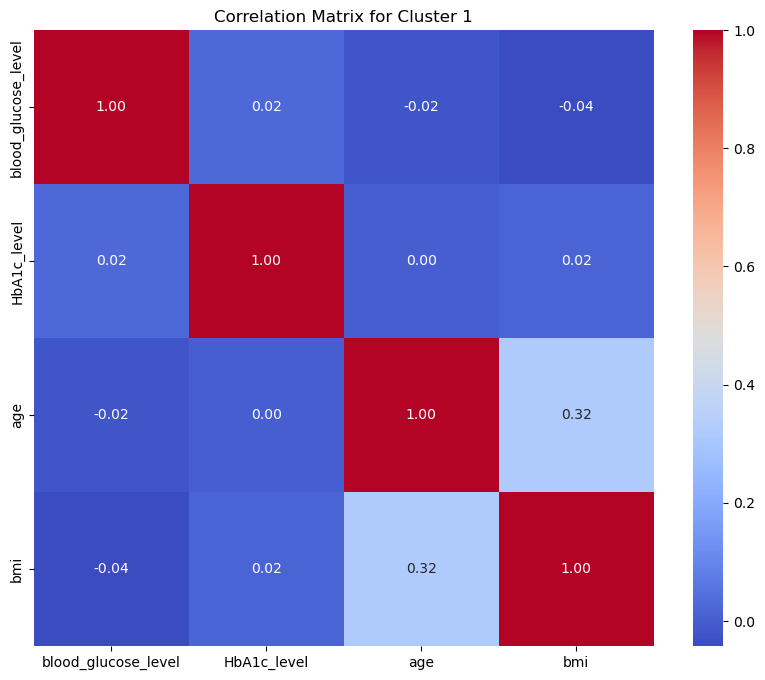

In [38]:
for cluster in sample_X['Cluster'].unique():
    subset = sample_X[sample_X['Cluster'] == cluster].drop(columns=['Cluster'])
    corr_matrix = subset.corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for Cluster {cluster}')
    plt.show()